# DECISION TREE

In [119]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
#reading the data
data=pd.read_csv('training_frame.csv')

In [121]:
#shape of the data
data.shape

(100000, 12)

In [122]:
#first five rows of the data
data.head()

,Unnamed: 0,vitals_datetime,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,patient_id,machine_id,Coded
0,0,2020-03-28 23:00:25+00:00,111.0,44.0,100.0,110.0,111.0,74.0,79.0,1585133,MICU-11,0.0
1,1,2020-03-28 23:01:10+00:00,85.0,12.0,97.0,92.0,95.0,60.0,77.0,1406566,BAY13-BZ,0.0
2,2,2020-03-28 23:30:29+00:00,92.0,6.0,99.0,92.0,113.0,71.0,93.0,1360999,SICU-09,0.0
3,3,2020-03-28 23:30:29+00:00,64.0,22.0,96.0,65.0,128.0,80.0,88.0,276287,NSU-03,0.0
4,4,2020-03-28 23:30:32+00:00,111.0,22.0,96.0,102.0,100.0,64.0,72.0,1267452,MICU-04,0.0


In [123]:
#checking missing values in the data
data.isnull().sum()

Unnamed: 0                      0
vitals_datetime                 0
heart_rate                      0
respiration_over_impedence      0
spirometry_oxygen_saturation    0
pulse                           0
blood_pressure_systolic         0
blood_pressure_diastolic        0
blood_pressure_average          0
patient_id                      0
machine_id                      0
Coded                           0
dtype: int64

In [124]:
data.drop_duplicates(subset='patient_id', keep='first', inplace=True)

In [125]:
data.drop(['Unnamed: 0','vitals_datetime','machine_id','patient_id'],axis=1,inplace=True)

In [126]:
#seperating independent and dependent variables
y = data['Coded']
X = data.drop(['Coded'], axis=1)

In [127]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split

In [128]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [129]:
# distribution in training set
y_train.value_counts(normalize=True)

0.0    0.922705
1.0    0.077295
Name: Coded, dtype: float64

In [130]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0.0    0.927536
1.0    0.072464
Name: Coded, dtype: float64

In [131]:
#shape of training set
X_train.shape, y_train.shape

((207, 7), (207,))

In [132]:
#shape of validation set
X_valid.shape, y_valid.shape

((69, 7), (69,))

In [133]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [134]:
# how to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [135]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [136]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [137]:
#checking the training score
dt_model.score(X_train, y_train)

1.0

In [138]:
#checking the validation score
dt_model.score(X_valid, y_valid)

0.8695652173913043

In [139]:
#predictions on validation set
dt_model.predict(X_valid)

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [140]:
dt_model.predict_proba(X_valid)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [141]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [142]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [143]:
from sklearn.metrics import classification_report as rep
print(rep( y_valid , y_new ))

              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        64
         1.0       0.00      0.00      0.00         5

    accuracy                           0.87        69
   macro avg       0.46      0.47      0.47        69
weighted avg       0.86      0.87      0.86        69



In [144]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(y_valid, y_new)

0.8695652173913043

## Changing the max_depth

In [146]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [147]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.922705,0.927536
1,2,0.932367,0.913043
2,3,0.937198,0.898551
3,4,0.942029,0.898551
4,5,0.951691,0.884058


No handles with labels found to put in legend.


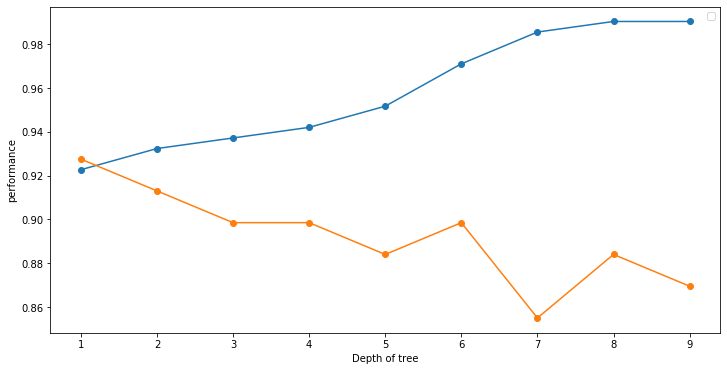

In [148]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

* max_leaf_nodes
* min_samples_split
* min_samples_leaf

In [149]:
dt_model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [150]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [151]:
#Training score
dt_model.score(X_train, y_train)

0.9903381642512077

In [152]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8695652173913043

In [153]:
from sklearn import tree

In [154]:
!pip install graphviz

In [158]:
decision_tree = tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=4,filled=True)

In [159]:
!dot -Tpng tree.dot -o tree.png

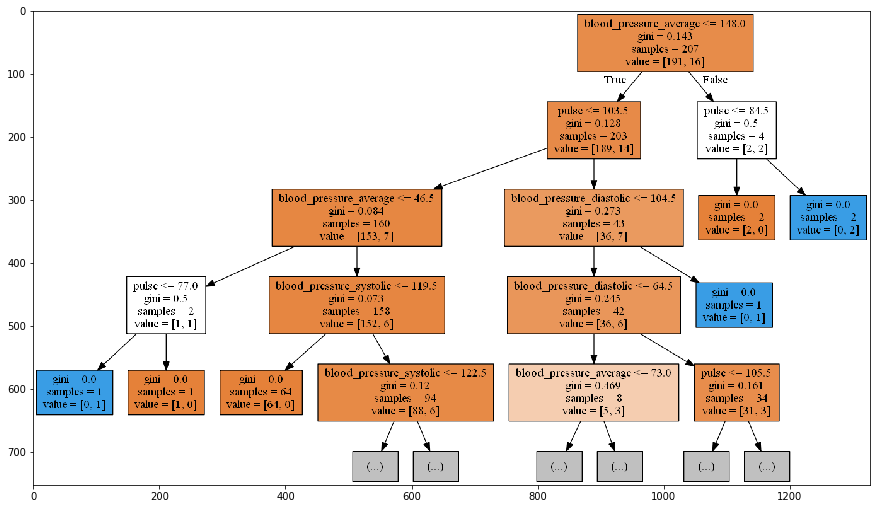

In [160]:
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)